# Data Visualization Exam – 2025-07-15

This exam contains **5 questions**. For each question, execute the provided code cell to generate a *sub-optimal* figure, then improve it as instructed. After making your changes, **reflect** (1-2 sentences) on *why* your improvements enhance the visual communication.

Feel free to add additional cells under each question if needed.

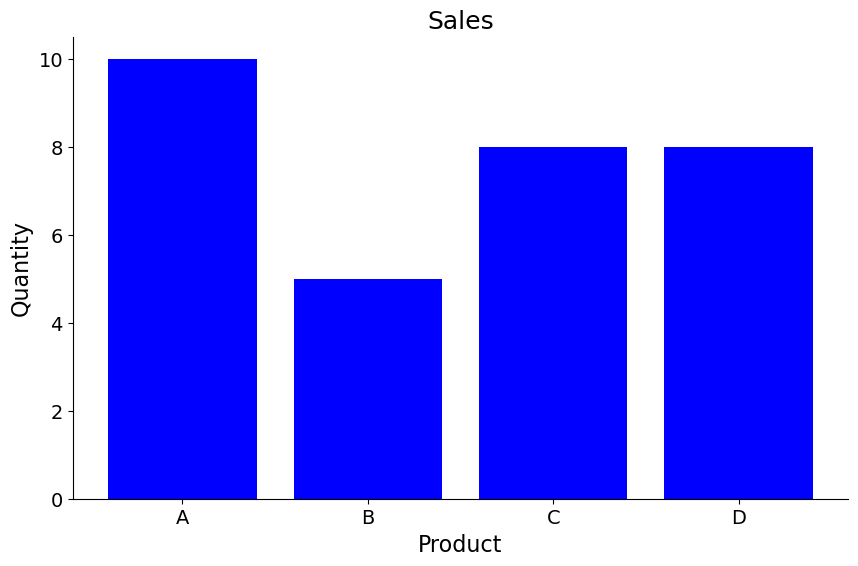

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
categories = ['A', 'B', 'C', 'D']
values = np.random.randint(5, 15, size=len(categories))

fig, ax = plt.subplots(figsize=(10, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.bar(categories, values, color='blue')
ax.set_title('Sales', fontsize=18)
ax.set_xlabel("Product", fontsize=16)
ax.set_ylabel("Quantity", fontsize=16)  # deliberately tiny
plt.show()



### Question 1 — Despine & Font Size

The plot above has **small fonts**, unnecessary **spines**, and no axis labels.

1. Improve the figure by:
   * Removing the top and right spines.
   * Increasing the font sizes of the title and tick labels.
   * Adding meaningful x- and y-axis labels.

2. Briefly explain *why* each change improves readability.


### Summary

The title font could be bigger and tick marks could be bigger so you actually know what you are looking at. 

X and Y axes labels could help for understanding the plot

The splines just limits the plot into a box that you cannot split it.

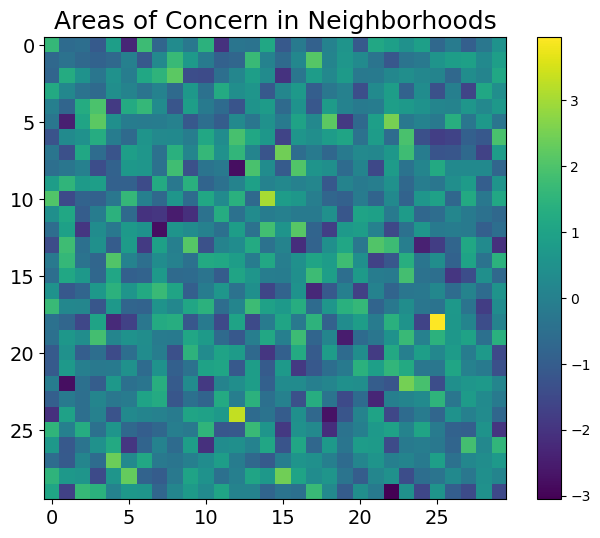

In [64]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
data = np.random.randn(30, 30)

fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.imshow(data, cmap='viridis')  # non-uniform colormap
ax.set_title('Areas of Concern in Neighborhoods', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.colorbar(cax)
plt.show()



### Question 2 — Perceptually Uniform Colormap

The heatmap uses the **`jet`** colormap, which is **not perceptually uniform**.

1. Replace the colormap with a perceptually uniform option (look this up please, you'll see huge documentation on it)
2. Adjust the font sizes and add an informative title (make one up).
3. Explain how your chosen colormap and styling choices improve the viewer's ability to discern values.


The chosen colormap can improve the viewer's ability to discern value because each value has a distinct color. However, because many people are red-green colorblind, this colormap avoids those colors so it is clear. The color scale is also clearly defined

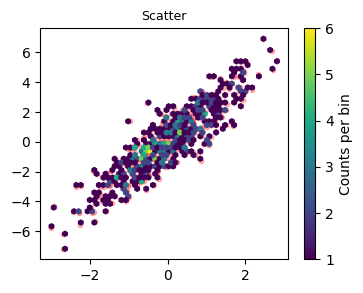

In [61]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
n = 500
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(x, y, color='red', s=10, alpha=0.25)  # opaque, single color
ax.set_title('Scatter', fontsize=9)
hb = ax.hexbin(x, y, gridsize=50, cmap='viridis', mincnt=1)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Counts per bin')
plt.show()



### Question 3 — Over-plotting & Transparency

The scatter plot over-plots points, making dense regions hard to perceive.

1. Mitigate over-plotting using **transparency (`alpha`)**, smaller marker size.
2. [Challenge only] Use a color palette consistent with data density through ax.hexbin(x, y, cmap = 'ARGUMENT'), where you provide argument
3. Provide a short reflection on how these adjustments clarify patterns.


These adjustment clearly shows patterns by highlighting the most dense areas of the scatterplot. This way the view can see where the bulk of the data is centered around

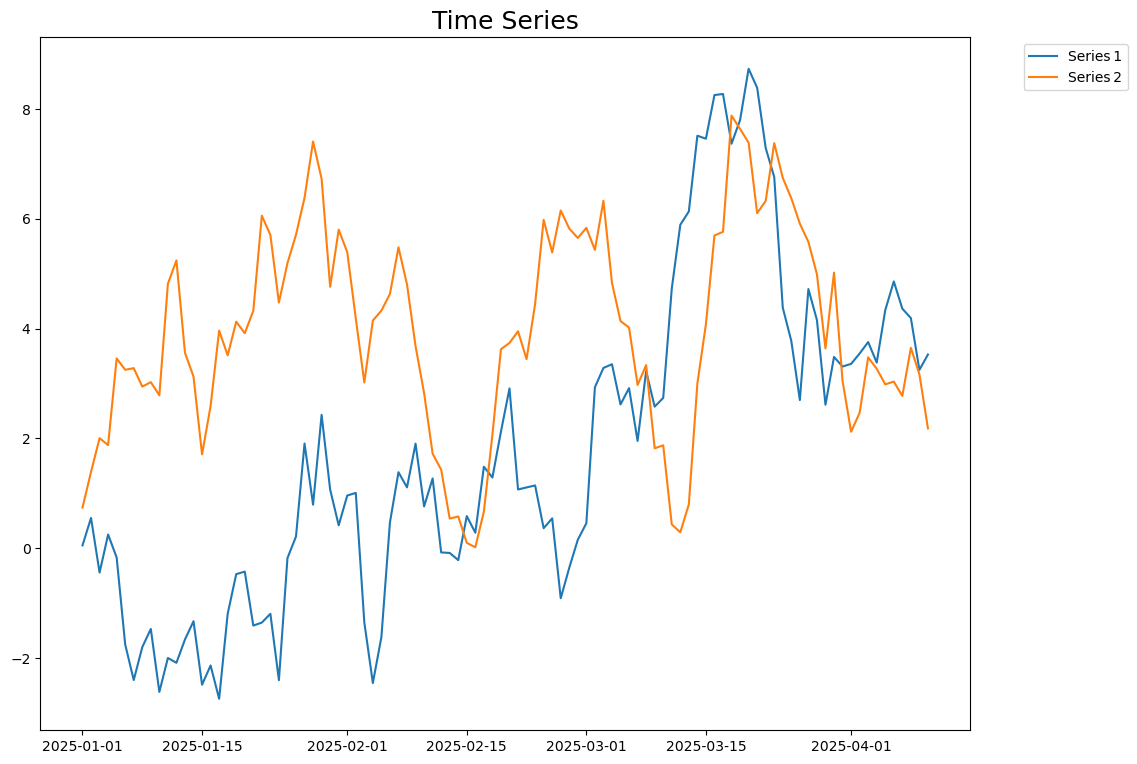

In [46]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(4)
dates = pd.date_range('2025-01-01', periods=100, freq='D')
series1 = np.cumsum(np.random.randn(100))
series2 = np.cumsum(np.random.randn(100))

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(dates, series1, label='Series 1')
ax.plot(dates, series2, label='Series 2')
ax.set_title('Time Series', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # overlays ticks
plt.xticks(rotation=0)
plt.show()



### Question 4 — Axes & Legend Placement

The time-series plot suffers from **cramped x-axis labels** and a legend that overlaps tick labels.

1. Rotate date ticks, use automatic date formatting, and expand the figure width.
2. Move the legend to a clearer position or outside the plotting area.
3. Explain why these revisions improve interpretability.


The dates are now clearly concise and readable. Expanding the graph makes the true trends more visible, the reader can clearly see where the trend dips and rises. The legend is also not blocking anything anymore

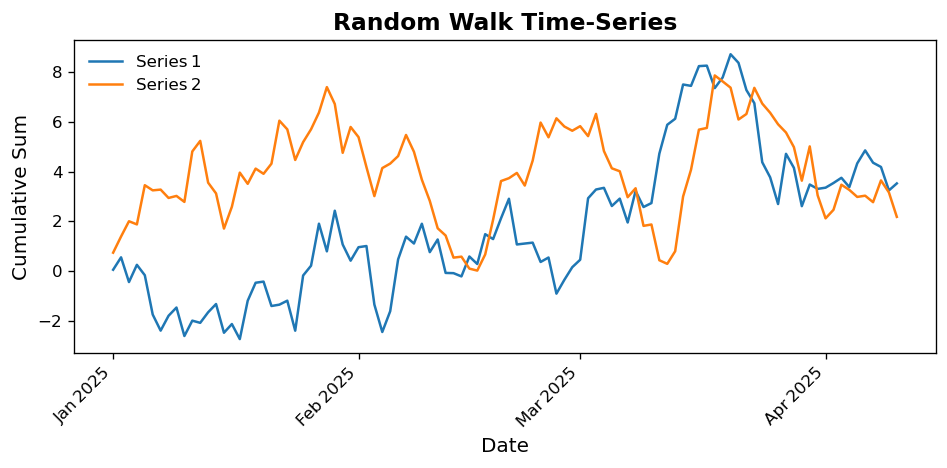

In [48]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8, 4), dpi=120)
ax.plot(dates, series1, label='Series 1', linewidth=1.5)
ax.plot(dates, series2, label='Series 2', linewidth=1.5)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Sum', fontsize=12)
ax.set_title('Random Walk Time-Series', fontsize=14, weight='bold')
ax.legend(loc='upper left', frameon=False)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
fig.tight_layout()
plt.show()

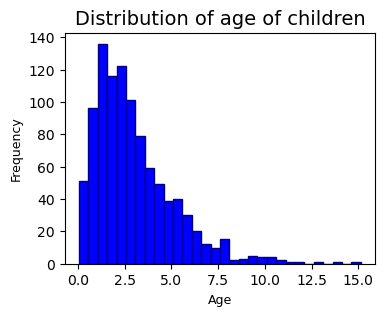

In [59]:

import numpy as np
import matplotlib.pyplot as plt


np.random.seed(5)
data = np.random.gamma(shape=2., scale=1.5, size=1000)

n = len(data)
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25

width = 2 * iqr / (float(n) ** (1/3))

min_val = min(data)
max_val = max(data)
bins = np.arange(min_val, max_val + width, width)

fig, ax = plt.subplots(figsize=(4, 3))
ax.hist(data, bins=bins, color='blue', edgecolor='navy')  # too many bins
ax.set_title('Distribution of age of children', fontsize=14)
ax.set_xlabel('Age', fontsize=9)
ax.set_ylabel('Frequency', fontsize=9)
plt.show()



### Question 5 — Histogram Bin Choice & Labels

The histogram uses **100 bins**, creating a noisy appearance.

1. Select an appropriate bin width using a rule (e.g., Freedman-Diaconis) or domain knowledge (your domain knowledge in this case can be trial and error).
2. Choose colors with sufficient contrast and remove heavy edges.
3. Add axis labels and a descriptive title.
4. Reflect on how your binning choice balances detail and clarity.


I used Freedman-Diaconis bin rule. Now, the bins are more visible so the specific values are more visible, and the overall trend is more clear. The distribution is now clearly skew right.